# Dragon Real Estate-Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel(r'C:\Users\Bhargav Patel\Desktop\Machine learning_jupyter_notebook\House_data.xlsx')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286836,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704071,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6150E9688>,
      dtype=object)

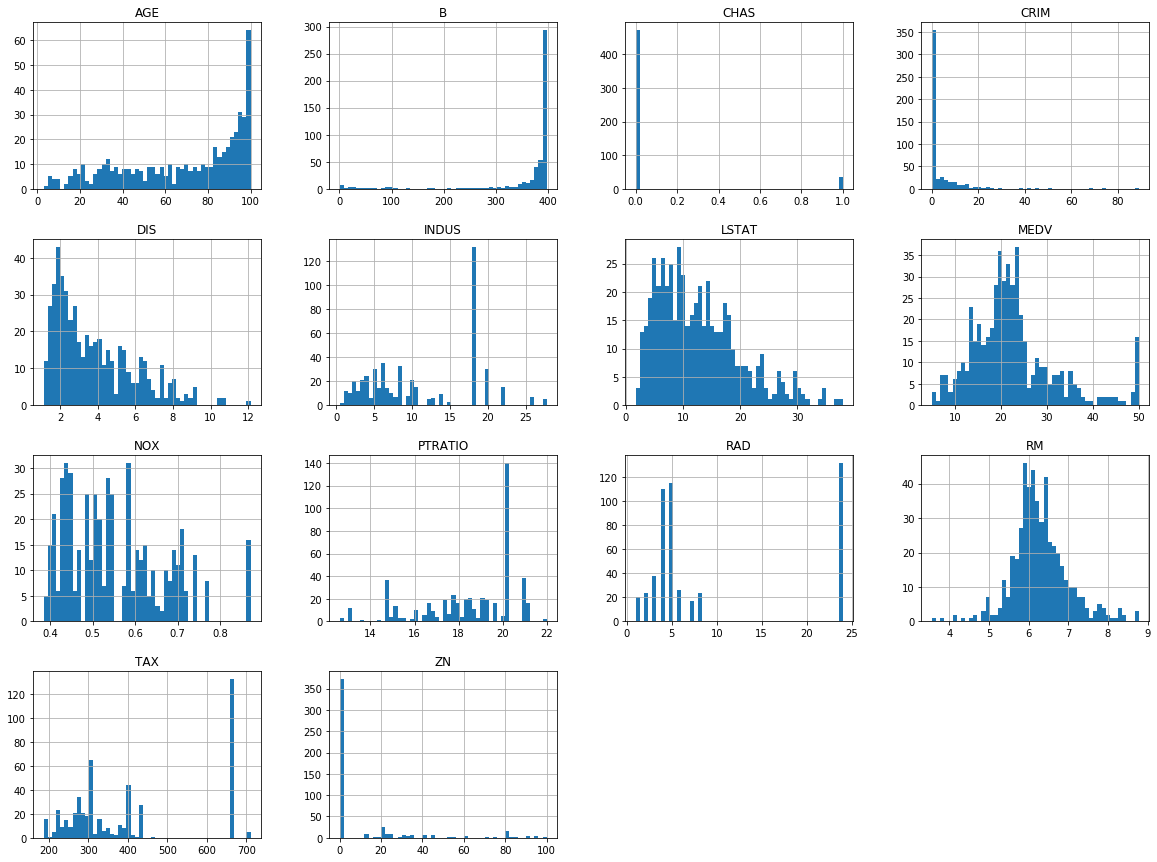

In [8]:
# for plotting Histogram
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize=(20,15))
# plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

Rows in train set : 404
Rows in test set : 102


In [10]:
# now, to suffele the data... because if don't suffle the data then   it can be happen that all data whose o/p is zero will in test set...  so,,accuracy will decrease during testing.
# We are doing suffling on base of main collumn...here, which is 'CHAS'
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['CHAS']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [11]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
#same ration of different types of o/p data...
print(95/7)
print(376/28)

13.571428571428571
13.428571428571429


In [14]:
data = strat_train_set.copy()

# looking for correlation

In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

#Here, 1 --->>>  shows that that collumn is completly correlated to Medv  ... like below  MEDV is definatly same it self....so, 1
#here, positive values shows that those collumns are positivily corrrelated to MEDV(output)..means that collumn's values will increase then value of MEDV will also increase.
#here, Negative values shows that those collumns are negativaly correlated to MEDV  .........means that collumn's values will increase then value of MECV will descrease...

MEDV       1.000000
RM         0.678813
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D61A753988>,
      dtype=object)

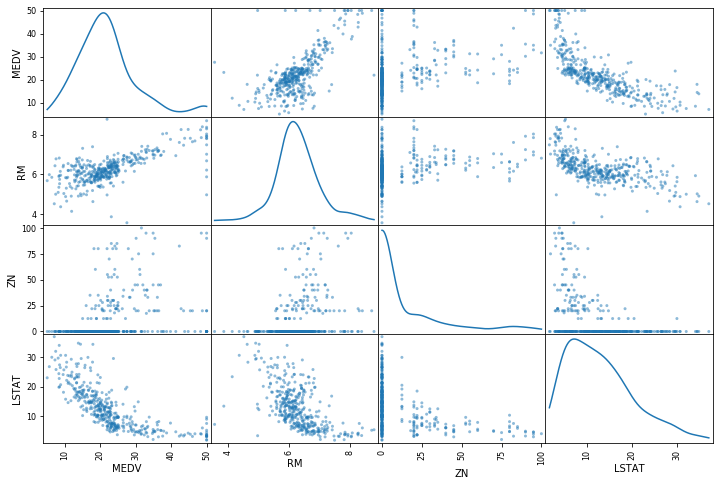

In [17]:
from pandas.plotting import scatter_matrix
#scatter_matrix(data, figsize=(12,8))   # it will give matrix of all attributes....  so, it is difficult to under stand  ...  so, now we will ploat matrix for some important attributes only..
att = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(data[att], figsize=(12,8), diagonal='kde') # we can also give diagonal='hist'

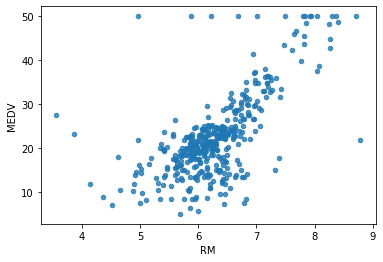

In [18]:
data.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)  # alpha to set darkness of scatter points.
# There is some outliers we can remove them.... also we can see that some homes have only 5 or 6 or 7 room and thire price is 50k, and some house have 9 rooms also their price is 50k...so, there is problem... that we can disscuss with our team

In [19]:
# Making new attribute... 
data['TAXRM'] = data['TAX']/data['RM']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [20]:
corr_matrix = data.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678813
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525567
LSTAT     -0.740494
Name: MEDV, dtype: float64

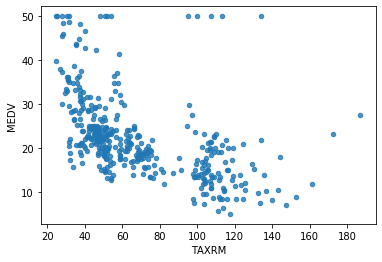

In [21]:
data.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [22]:
# seperate the lables and output...
data = strat_train_set.drop("MEDV", axis=1)
data_out = strat_train_set["MEDV"].copy()

# deal with missing values

In [23]:
# There are 3 ways to deal with missing values
#     1) remove that rows.... (if few missing values)
#     2) remove that collumn   ... (if collumn is not importan(correaltion is not a high positive or not a high negative))
#     3) set that missing value to some value(0 or mean or median)

In [24]:
#option1
data1 = data.dropna(subset=["RM"])  # if we want to change in original data...then we have to pass argument.... inplace=True
data1.shape
# Note that the original data will remain unchanged

(400, 13)

In [25]:
#option2
data2 = data.drop('RM', axis=1)
data2.shape
# Note that the original data will remain unchanged

(404, 12)

In [26]:
#option3
median = data['RM'].median()
data['RM'].fillna(median)
# Note that the original data will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [27]:
# To deal with null values using Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [29]:
imputer.statistics_.shape

(13,)

In [30]:
x = imputer.transform(data)
data_tr = pd.DataFrame(x, columns = data.columns)
data_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280166,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711396,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

primarily- Three types of objects

1. Estimators - It Estimates some parameters based on a dataset. Eg. imputer
    -It has a Fit method and Transform method 
    -Fit method - Fits the dataset and calculates internal parameters
    
2. Transformers - transform method takes input and return output based on the learning from fit(). It also has a convenience      function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression moel is a example of predictor.  fit() and predict() are two common functios.  

# Feature Scaling

Primarily, Two type of Feature scaling methods:
1. Min-max scaling (Normalization)
    - (Value-min) / (max-min)
        - Sklearn provides a class called MINMaxScaler for this
2. Standerdization
    - (value-mean) / Std
        - sklearn provides a class called StandarScaler for this

# Creating a Pipe-line

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())  # we can add as many we want in our pipeline...
])

In [32]:
data_num_tr = my_pipeline.fit_transform(data_tr) # we can use data also insted of data_tr..because we also use imputer in pipeline

In [33]:
print(data_num_tr.shape)
data_num_tr  # it is numpy array

(404, 13)


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

# Selecting a desired model for Dragon Real Estates

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_num_tr, data_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
some_data = data.iloc[:5]
some_out = data_out[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.95396666, 27.21083243, 20.55589956, 25.05585333, 23.77883246])

In [36]:
list(some_out)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [37]:
from sklearn.metrics import mean_squared_error
data_predict = model.predict(data_num_tr)
error_mse = mean_squared_error(data_out, data_predict)
error_rmse = np.sqrt(error_mse)

In [38]:
error_rmse  # try other model also

4.837294931770997

In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(data_num_tr, data_out)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
some_data = data.iloc[:5]
some_out = data_out[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [41]:
from sklearn.metrics import mean_squared_error
data_predict = model.predict(data_num_tr)
error_mse = mean_squared_error(data_out, data_predict)
error_rmse = np.sqrt(error_mse)
error_mse  # it is overfitted...because there is o% error

0.0

# Using better evaluation technique - Cross Validation

In [42]:
# cross_validation check the model with different combination of data...
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, data_num_tr, data_out, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-score)   # score value is negative...so, to get sqrt.. we have to convert it into positive value...

In [43]:
rmse_score

array([4.32835236, 5.63008036, 5.41490716, 3.946502  , 3.7026342 ,
       4.00103112, 7.35671462, 3.72280136, 3.81880217, 3.83239481])

In [44]:
def print_score(score):
    print("score : ", score)
    print("mean : ", score.mean())
    print("standard_deviation : ", score.std())

In [45]:
print_score(rmse_score)

score :  [4.32835236 5.63008036 5.41490716 3.946502   3.7026342  4.00103112
 7.35671462 3.72280136 3.81880217 3.83239481]
mean :  4.575422015885899
standard_deviation :  1.1380870068159141


# saving the model

In [46]:
from joblib import dump, load
dump(model, 'Dregon .joblib')

['Dregon .joblib']

# testing the model on test data

In [47]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_predict = my_pipeline.transform(x_test)
final_predict = model.predict(x_test_predict)
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_predict, list(y_test))

4.221385796064568
[29.4 10.9 22.8 22.8 20.  13.8 23.7 11.3 34.9 43.5 21.7 10.9 23.3 19.6
 19.  11.3 28.7 15.6 22.9 17.8 23.  14.3 10.9 21.7 16.1 33.1 17.1 33.1
 10.2 34.9 20.  20.6 22.2 10.9 22.3  8.3 48.8 25.2 29.1 45.4 23.1 22.8
 20.2 19.6 16.2 37.  48.3 20.6 20.1 18.2 24.5 19.1 22.4 17.1 29.4 36.4
 37.6 30.8 19.4 20.6 50.   5.6 17.5 28.7 17.8 33.4 17.4 13.4 19.6 36.4
 22.1 22.6 18.5 22.6 34.9 13.8 15.6 18.2 20.6 21.  21.6 20.6 13.4 20.5
 23.3 21.2  8.7 18.9 21.6 24.4 17.5 25.   5.  29.4 21.9 31.1 24.5 28.7
  8.5 29.1 22.  18.8] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.